In [2]:
from pyspark import SparkContext
sc = SparkContext(master = 'local[*]', appName = 'HomeWork_02')
text_rdd = sc.textFile("/home/ali/DataScience/lax_passengers_header.csv")
text_rdd.top(5)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/02/23 14:50:24 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/02/23 14:50:25 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


['DataExtractDate,ReportPeriod,Terminal,Arrival_Departure,Domestic_International,Passenger_Count',
 '12/15/2016 08:00:29 AM,10/01/2016 12:00:00 AM,Tom Bradley International Terminal,Departure,International,561063',
 '12/15/2016 08:00:29 AM,10/01/2016 12:00:00 AM,Tom Bradley International Terminal,Departure,Domestic,40749',
 '12/15/2016 08:00:29 AM,10/01/2016 12:00:00 AM,Tom Bradley International Terminal,Arrival,International,577653',
 '12/15/2016 08:00:29 AM,10/01/2016 12:00:00 AM,Tom Bradley International Terminal,Arrival,Domestic,19488']

In [3]:
header = text_rdd.first()
text_rdd = text_rdd.filter(lambda x: x != header)
text_rdd.top(5)

['12/15/2016 08:00:29 AM,10/01/2016 12:00:00 AM,Tom Bradley International Terminal,Departure,International,561063',
 '12/15/2016 08:00:29 AM,10/01/2016 12:00:00 AM,Tom Bradley International Terminal,Departure,Domestic,40749',
 '12/15/2016 08:00:29 AM,10/01/2016 12:00:00 AM,Tom Bradley International Terminal,Arrival,International,577653',
 '12/15/2016 08:00:29 AM,10/01/2016 12:00:00 AM,Tom Bradley International Terminal,Arrival,Domestic,19488',
 '12/15/2016 08:00:29 AM,10/01/2016 12:00:00 AM,Terminal 8,Departure,International,6219']

In [5]:
line_rdd = text_rdd.map(lambda x: x.split(",")).map(lambda x: (x[1].split()[0], int(x[5])))
line_rdd.top(10)

[('12/01/2016', 553425),
 ('12/01/2016', 542156),
 ('12/01/2016', 419138),
 ('12/01/2016', 410292),
 ('12/01/2016', 401339),
 ('12/01/2016', 389480),
 ('12/01/2016', 355396),
 ('12/01/2016', 333465),
 ('12/01/2016', 328574),
 ('12/01/2016', 326577)]

In [13]:
passenger_count_by_month_rdd = line_rdd.map(lambda x: ((x[0].split("/")[2], x[0].split("/")[0]), x[1])).reduceByKey(lambda a, b: a + b).sortByKey()
passenger_count_by_month_rdd.top(10)

[(('2017', '08'), 7930082),
 (('2017', '07'), 8176029),
 (('2017', '06'), 7726882),
 (('2017', '05'), 7167451),
 (('2017', '04'), 6874237),
 (('2017', '03'), 6779400),
 (('2017', '02'), 5604244),
 (('2017', '01'), 6444587),
 (('2016', '12'), 6872261),
 (('2016', '11'), 6496118)]

In [14]:
for (year, month), passenger_count in passenger_count_by_month_rdd.collect():
    if passenger_count > 5000000:
        print(f"{month}/{year}       {passenger_count}")

03/2006       5090294
04/2006       5087874
05/2006       5177408
06/2006       5510023
07/2006       5919723
08/2006       5745243
12/2006       5072332
03/2007       5241814
04/2007       5173114
05/2007       5256929
06/2007       5626463
07/2007       6052849
08/2007       5939548
10/2007       5070042
12/2007       5187718
03/2008       5233679
05/2008       5247987
06/2008       5539873
07/2008       5791568
08/2008       5715285
06/2009       5040491
07/2009       5604410
08/2009       5437442
06/2010       5311394
07/2010       5692861
08/2010       5617846
12/2010       5049857
04/2011       5028216
05/2011       5477064
06/2011       5631716
07/2011       6071342
08/2011       5918524
10/2011       5124604
12/2011       5028644
03/2012       5252557
04/2012       5161128
05/2012       5412946
06/2012       5739904
07/2012       6190326
08/2012       6093345
09/2012       5054257
10/2012       5191471
12/2012       5278513
01/2013       5050736
03/2013       5545523
04/2013   

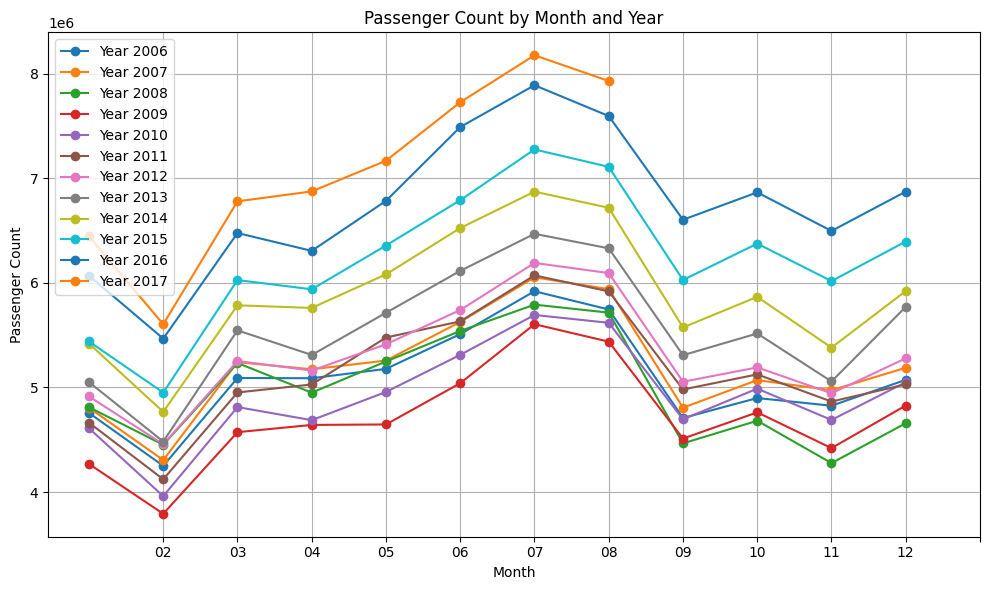

In [25]:
data_by_year = {}
for ((year, month), count) in passenger_count_by_month_rdd.collect():
    if year not in data_by_year:
        data_by_year[year] = []
    data_by_year[year].append((month, count))

plt.figure(figsize=(10, 6))
for year, data in sorted(data_by_year.items()):
    months = [month for month, _ in data]
    counts = [count for _, count in data]
    plt.plot(months, counts, marker='o', label=f'Year {year}')

plt.title('Passenger Count by Month and Year')
plt.xlabel('Month')
plt.ylabel('Passenger Count')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

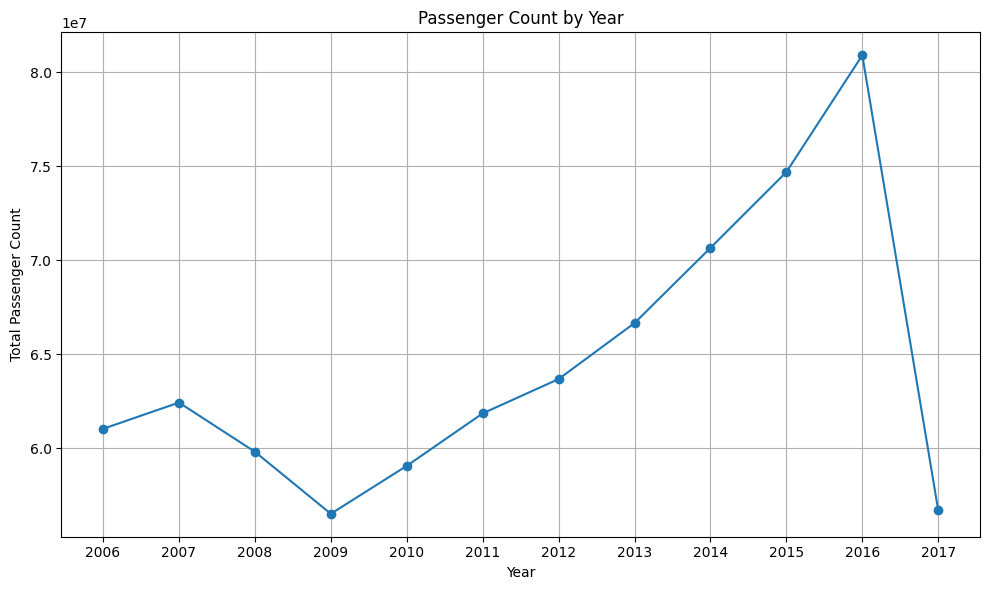

In [28]:
years = []
passenger_counts = []

for year, month_count in data_by_year.items():
    years.append(year)
    counts = sum(count for _, count in month_count)
    passenger_counts.append(counts)

plt.figure(figsize=(10, 6))
plt.plot(years, passenger_counts, marker='o', linestyle='-')
plt.title('Passenger Count by Year')
plt.xlabel('Year')
plt.ylabel('Total Passenger Count')
plt.grid(True)
plt.tight_layout()

plt.show()